In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans

In [4]:
iris = pd.read_csv('datasets/iris.csv',
                   skiprows= 1,
                   names= ['sepal-length',
                           'sepal-width',
                           'petal-length',
                           'petal-width',
                           'class'])
iris.shape

(150, 5)

In [5]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#shuffling data

iris = iris.sample(frac= 1).reset_index(drop= True)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.7,2.5,5.0,2.0,Iris-virginica
1,6.6,3.0,4.4,1.4,Iris-versicolor
2,6.7,3.0,5.0,1.7,Iris-versicolor
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.3,3.0,1.1,0.1,Iris-setosa


In [7]:
iris['class'].unique()

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [8]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
iris['class']= label_encoding.fit_transform(iris['class'].astype(str))

iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.7,2.5,5.0,2.0,2
1,6.6,3.0,4.4,1.4,1
2,6.7,3.0,5.0,1.7,1
3,4.7,3.2,1.3,0.2,0
4,4.3,3.0,1.1,0.1,0


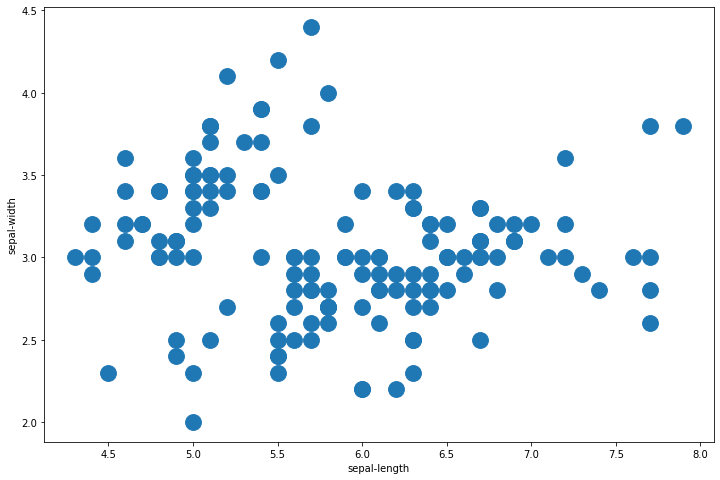

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris['sepal-length'], iris['sepal-width'],
            s= 250)
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

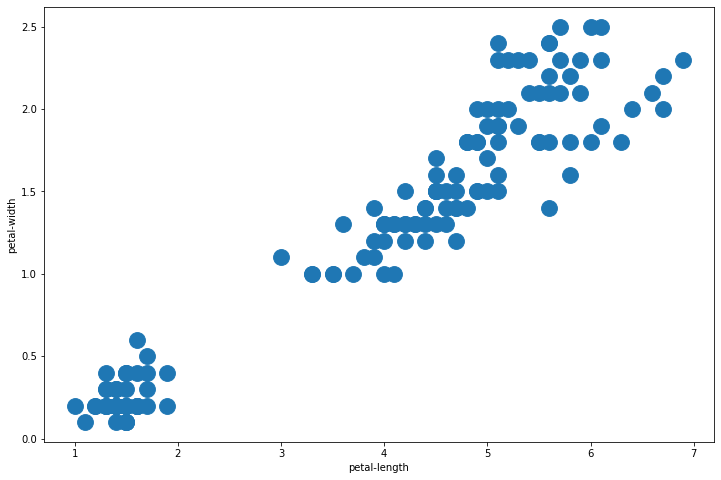

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris['petal-length'], iris['petal-width'],
            s= 250)
plt.xlabel('petal-length')
plt.ylabel('petal-width')

plt.show()

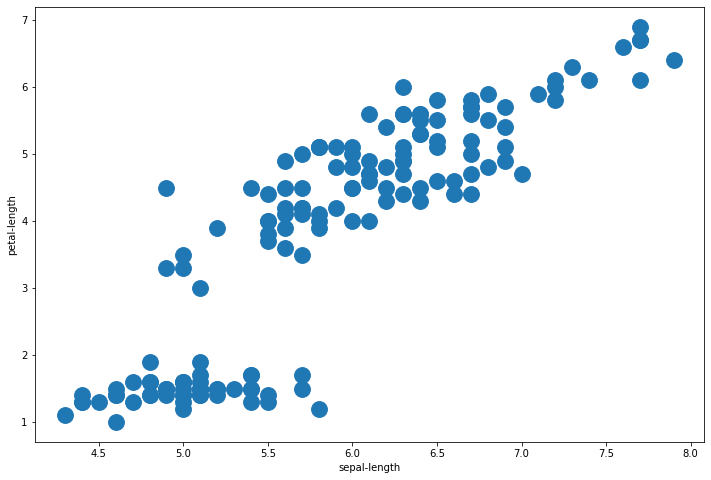

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris['sepal-length'], iris['petal-length'],
            s= 250)
plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()

### clustering with 2 features

In [13]:
iris_2d = iris[['sepal-length', 'petal-length']]
iris_2d.head()

,sepal-length,petal-length
0,5.7,5.0
1,6.6,4.4
2,6.7,5.0
3,4.7,1.3
4,4.3,1.1


In [14]:
iris_2d = np.array(iris_2d)

In [15]:
kmeans_model_2d = KMeans(n_clusters= 3, max_iter= 1000).fit(iris_2d)

In [16]:
kmeans_model_2d.labels_

array([0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0], dtype=int32)

In [17]:
centroids_2d = kmeans_model_2d.cluster_centers_
centroids_2d

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49411765],
       [6.83902439, 5.67804878]])

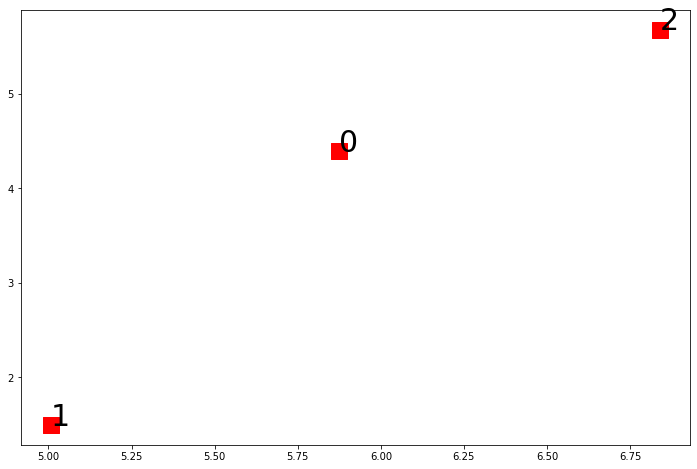

In [19]:
fig, ax = plt.subplots(figsize= (12,8))

plt.scatter(centroids_2d[:,0], centroids_2d[:,1],
            c= 'r',
            s= 250,
            marker= 's')

for i in range(len(centroids_2d)):
    plt.annotate(i, (centroids_2d[i][0], centroids_2d[i][1]),
                 fontsize= 30)

In [21]:
iris_labels = iris['class']

In [23]:
print("homogeneity score: ", metrics.homogeneity_score(iris_labels, kmeans_model_2d.labels_))
print("completeness score: ", metrics.completeness_score(iris_labels, kmeans_model_2d.labels_))
print("v_measure score: ", metrics.v_measure_score(iris_labels, kmeans_model_2d.labels_))
print("adjusted rand score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model_2d.labels_))
print("adjusted mutual info score: ", metrics.adjusted_mutual_info_score(iris_labels, kmeans_model_2d.labels_))
print("silhouette score: ", metrics.silhouette_score(iris_2d, kmeans_model_2d.labels_))

homogeneity score:  0.7033177646052958
completeness score:  0.7096993707802843
v_measure score:  0.706494157075837
adjusted rand score:  0.6988627672348092
adjusted mutual info score:  0.7028024531409133
silhouette score:  0.5890612473759282


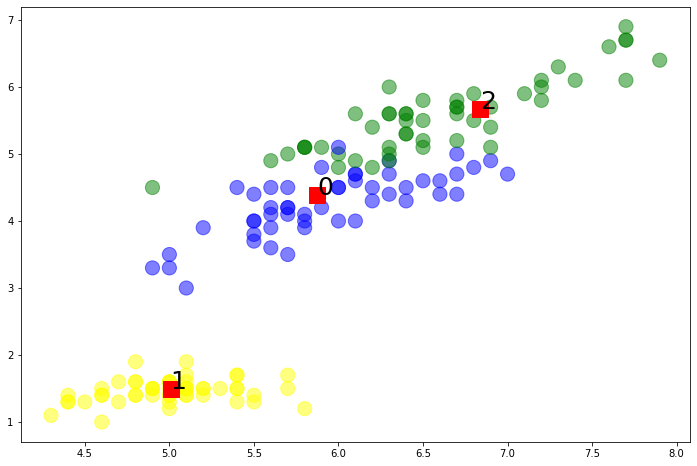

In [26]:
colors = ['yellow', 'blue', 'green']
plt.figure(figsize=(12,8))

plt.scatter(iris['sepal-length'], iris['petal-length'],
            c= iris['class'],
            s= 200,
            cmap= matplotlib.colors.ListedColormap(colors),
            alpha= 0.5)

plt.scatter(centroids_2d[:,0], centroids_2d[:,1],
            c= 'r',
            s=250,
            marker= 's')
for i in range(len(centroids_2d)):
    plt.annotate(i, (centroids_2d[i][0], centroids_2d[i][1]),
                 fontsize= 25)


### clustering using all 4 features

In [27]:
iris_fe = iris.drop('class', axis= 1)
iris_fe.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.7,2.5,5.0,2.0
1,6.6,3.0,4.4,1.4
2,6.7,3.0,5.0,1.7
3,4.7,3.2,1.3,0.2
4,4.3,3.0,1.1,0.1


In [28]:
kmeans_model = KMeans(n_clusters= 3).fit(iris_fe)

In [29]:
kmeans_model_2d.labels_

array([0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0], dtype=int32)

In [31]:
kmeans_model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [32]:
print("homogeneity score: ", metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("completeness score: ", metrics.completeness_score(iris_labels, kmeans_model.labels_))
print("v_measure score: ", metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print("adjusted rand score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print("adjusted mutual info score: ", metrics.adjusted_mutual_info_score(iris_labels, kmeans_model.labels_))
print("silhouette score: ", metrics.silhouette_score(iris, kmeans_model.labels_))

homogeneity score:  0.7514854021988338
completeness score:  0.7649861514489815
v_measure score:  0.7581756800057784
adjusted rand score:  0.7302382722834697
adjusted mutual info score:  0.7551191675800484
silhouette score:  0.553339169397107
